# Problem Statement

A Microfinance instituition (MFI) is an organization that offers financial services to low income populations. A telecom industry is collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The task is to build a machine learning model which can be used to predict transaction for each loan in terms of probability whether the customer will pay back the loaned amount within 5 days of insurance of loan. Here, "label 1" indicates that the loan has been paid i.e. "Non-defaulter", while, "Label 0" indicates that the loan has not been paid i.e. "Defaullter". The problem is seen to be a classification problem.

# Importing Dataset

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Dataset
df=pd.read_csv('Data-file.csv')
#Visualizing dataset
df

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0         220.13    260.13                2.0                0.0  ...   
1        3691.26   3691.26               20.0                0.0  ...   
2         900.13    900.13                3.0                0.0  ...   
3         159.42    159.42               41.0                0.0  ...   
4        1098.90   1098.90                4.0                0.0  ...   
...          ...       ...                ...                ...  ...   
209588   1089.19   1089.19                1.0                0.0  ...   
209589   1728.36   1728.36                4.0                0.0  ...   
209590   5861.83   8893.20                3.0                0.0  ...   
209591    411.83    984.58                2.0               38.0  ...   
209592    483.92    631.20               13.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

             pdate  
0       2016-07-20  
1       2016-08-10  
2       2016-08-19  
3       2016-06-06  
4       2016-06-22  
...            ...  
209588  2016-06-17  
209589  2016-06-12  
209590  2016-07-29  
209591  2016-07-25  
209592  2016-07-07  

[209593 rows x 37 columns]

The dataset consists of 209593 records and 37 attributes in the dataset initially.

We can see an "Unnamed: 0" column acting as an index in the dataset which does not serve as any information to the data. Hence, we drop the column. 

We can see another variable "msisdn" with big values which are the mobile numbers of the users and does not have any relevance with the data analysis. Hence, we will treat this column as an index.

In [3]:
#Initial variables in the dataset (before data cleaning)
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [4]:
#Dropping "Unnamed: 0" column from the dataset
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
#Setting "msisdn" as index
df.set_index("msisdn",inplace=True)
#Visualizing first 5 columns of dataset
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
msisdn                                                                      
21408I70789      0  272.0   3055.050000   3065.150000    220.13    260.13   
76462I70374      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
17943I70372      1  535.0   1398.000000   1398.000000    900.13    900.13   
55773I70781      1  241.0     21.228000     21.228000    159.42    159.42   
03813I82730      1  947.0    150.619333    150.619333   1098.90   1098.90   

             last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
msisdn                                                                
21408I70789                2.0                0.0              1539   
76462I70374               20.0                0.0              5787   
17943I70372                3.0                0.0              1539   
55773I70781               41.0                0.0               947   
03813I82730                4.0                0.0              2309   

             cnt_ma_rech30  ...  maxamnt_loans30  medianamnt_loans30  \
msisdn                      ...                                        
21408I70789              2  ...              6.0                 0.0   
76462I70374              1  ...             12.0                 0.0   
17943I70372              1  ...              6.0                 0.0   
55773I70781              0  ...              6.0                 0.0   
03813I82730              7  ...              6.0                 0.0   

             cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
msisdn                                                                        
21408I70789          2.0            12                6                 0.0   
76462I70374          1.0            12               12                 0.0   
17943I70372          1.0             6                6                 0.0   
55773I70781          2.0            12                6                 0.0   
03813I82730          7.0            42                6                 0.0   

             payback30  payback90  pcircle       pdate  
msisdn                                                  
21408I70789  29.000000  29.000000      UPW  2016-07-20  
76462I70374   0.000000   0.000000      UPW  2016-08-10  
17943I70372   0.000000   0.000000      UPW  2016-08-19  
55773I70781   0.000000   0.000000      UPW  2016-06-06  
03813I82730   2.333333   2.333333      UPW  2016-06-22  

[5 rows x 35 columns]

Hence, we can notice that the variable "Unnamed: 0" has been dropped and column "msisdn" is featuring like an index in the dataset.

As we can see we have lots of columns present in the dataset but cannot see all of them in the above dataframe, we will try to visualize the maximum attributes possible.

In [6]:
#Displaying maximum columns for better understaning of data
pd.set_option('display.max_columns',None)

In [7]:
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
msisdn                                                                      
21408I70789      0  272.0   3055.050000   3065.150000    220.13    260.13   
76462I70374      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
17943I70372      1  535.0   1398.000000   1398.000000    900.13    900.13   
55773I70781      1  241.0     21.228000     21.228000    159.42    159.42   
03813I82730      1  947.0    150.619333    150.619333   1098.90   1098.90   

             last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
msisdn                                                                
21408I70789                2.0                0.0              1539   
76462I70374               20.0                0.0              5787   
17943I70372                3.0                0.0              1539   
55773I70781               41.0                0.0               947   
03813I82730                4.0                0.0              2309   

             cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  \
msisdn                                                        
21408I70789              2          21.0             3078.0   
76462I70374              1           0.0             5787.0   
17943I70372              1           0.0             1539.0   
55773I70781              0           0.0                0.0   
03813I82730              7           2.0            20029.0   

             medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
msisdn                                                                   
21408I70789                1539.0                  7.50              2   
76462I70374                5787.0                 61.04              1   
17943I70372                1539.0                 66.32              1   
55773I70781                   0.0                  0.00              1   
03813I82730                2309.0                 29.00              8   

             fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
msisdn                                                               
21408I70789            21               3078                1539.0   
76462I70374             0               5787                5787.0   
17943I70372             0               1539                1539.0   
55773I70781             0                947                 947.0   
03813I82730             2              23496                2888.0   

             medianmarechprebal90  cnt_da_rech30  fr_da_rech30  cnt_da_rech90  \
msisdn                                                                          
21408I70789                  7.50            0.0           0.0              0   
76462I70374                 61.04            0.0           0.0              0   
17943I70372                 66.32            0.0           0.0              0   
55773I70781                  2.50            0.0           0.0              0   
03813I82730                 35.00            0.0           0.0              0   

             fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
msisdn                                                                  
21408I70789             0            2            12              6.0   
76462I70374             0            1            12             12.0   
17943I70372             0            1             6              6.0   
55773I70781             0            2            12              6.0   
03813I82730             0            7            42              6.0   

             medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
msisdn                                                                        
21408I70789                 0.0          2.0            12                6   
76462I70374                 0.0          1.0            12               12   
17943I70372                 0.0          1.0             6                6   
55773I70781                 0.0          2.0    

We can now see all the columns being displayed in the dataframe.

Let us split the "pdate" variable into pdate, pmonth and pyear to get the insights of the data.

In [8]:
#Splitting variable "pdate" into pday, pmonth and pyear
df["pyear"]=df["pdate"].str.split("-").str[0]
df["pmonth"]=df["pdate"].str.split("-").str[1]
df["pdate"]=df["pdate"].str.split("-").str[2]

In [9]:
#Displaying data to verify the splitted data
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
msisdn                                                                      
21408I70789      0  272.0   3055.050000   3065.150000    220.13    260.13   
76462I70374      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
17943I70372      1  535.0   1398.000000   1398.000000    900.13    900.13   
55773I70781      1  241.0     21.228000     21.228000    159.42    159.42   
03813I82730      1  947.0    150.619333    150.619333   1098.90   1098.90   

             last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
msisdn                                                                
21408I70789                2.0                0.0              1539   
76462I70374               20.0                0.0              5787   
17943I70372                3.0                0.0              1539   
55773I70781               41.0                0.0               947   
03813I82730                4.0                0.0              2309   

             cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  \
msisdn                                                        
21408I70789              2          21.0             3078.0   
76462I70374              1           0.0             5787.0   
17943I70372              1           0.0             1539.0   
55773I70781              0           0.0                0.0   
03813I82730              7           2.0            20029.0   

             medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
msisdn                                                                   
21408I70789                1539.0                  7.50              2   
76462I70374                5787.0                 61.04              1   
17943I70372                1539.0                 66.32              1   
55773I70781                   0.0                  0.00              1   
03813I82730                2309.0                 29.00              8   

             fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
msisdn                                                               
21408I70789            21               3078                1539.0   
76462I70374             0               5787                5787.0   
17943I70372             0               1539                1539.0   
55773I70781             0                947                 947.0   
03813I82730             2              23496                2888.0   

             medianmarechprebal90  cnt_da_rech30  fr_da_rech30  cnt_da_rech90  \
msisdn                                                                          
21408I70789                  7.50            0.0           0.0              0   
76462I70374                 61.04            0.0           0.0              0   
17943I70372                 66.32            0.0           0.0              0   
55773I70781                  2.50            0.0           0.0              0   
03813I82730                 35.00            0.0           0.0              0   

             fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
msisdn                                                                  
21408I70789             0            2            12              6.0   
76462I70374             0            1            12             12.0   
17943I70372             0            1             6              6.0   
55773I70781             0            2            12              6.0   
03813I82730             0            7            42              6.0   

             medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
msisdn                                                                        
21408I70789                 0.0          2.0            12                6   
76462I70374                 0.0          1.0            12               12   
17943I70372                 0.0          1.0             6                6   
55773I70781                 0.0          2.0    

Variable "pdate" is now splitted into three columns of pdate, pmonth and pyear.

In [10]:
#Checking size of present dataset
df.shape

(209593, 37)

The dataset now consits of 37 columns.

In [11]:
#Checking data types of the new attributes creates
df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

The data types of pdate, pyear and pmonth is showing as object datatype. Hence, we will convert it to an integer type of data.

In [12]:
#Converting object variables into integer type
df["pyear"]=df["pyear"].astype(int)
df["pmonth"]=df["pmonth"].astype(int)
df["pdate"]=df["pdate"].astype(int)

In [13]:
#Verifying data types of retrieved data
df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

The data types of variables pdate, pyear and pmonth is now of the integer type. Only attribute "pcircle" is of the object datatype, hence we will convert these string values into integer numbers using the Label Encoder Encoding technique. 

# Data Encoding

In [14]:
#Importing library for label encoding 
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [15]:
#Creating an object for label encoder and applying it on the column
le=LabelEncoder()
df['pcircle']=le.fit_transform(df['pcircle'])

In [16]:
#Verifying encoded column
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
msisdn                                                                      
21408I70789      0  272.0   3055.050000   3065.150000    220.13    260.13   
76462I70374      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
17943I70372      1  535.0   1398.000000   1398.000000    900.13    900.13   
55773I70781      1  241.0     21.228000     21.228000    159.42    159.42   
03813I82730      1  947.0    150.619333    150.619333   1098.90   1098.90   

             last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
msisdn                                                                
21408I70789                2.0                0.0              1539   
76462I70374               20.0                0.0              5787   
17943I70372                3.0                0.0              1539   
55773I70781               41.0                0.0               947   
03813I82730                4.0                0.0              2309   

             cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  \
msisdn                                                        
21408I70789              2          21.0             3078.0   
76462I70374              1           0.0             5787.0   
17943I70372              1           0.0             1539.0   
55773I70781              0           0.0                0.0   
03813I82730              7           2.0            20029.0   

             medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
msisdn                                                                   
21408I70789                1539.0                  7.50              2   
76462I70374                5787.0                 61.04              1   
17943I70372                1539.0                 66.32              1   
55773I70781                   0.0                  0.00              1   
03813I82730                2309.0                 29.00              8   

             fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
msisdn                                                               
21408I70789            21               3078                1539.0   
76462I70374             0               5787                5787.0   
17943I70372             0               1539                1539.0   
55773I70781             0                947                 947.0   
03813I82730             2              23496                2888.0   

             medianmarechprebal90  cnt_da_rech30  fr_da_rech30  cnt_da_rech90  \
msisdn                                                                          
21408I70789                  7.50            0.0           0.0              0   
76462I70374                 61.04            0.0           0.0              0   
17943I70372                 66.32            0.0           0.0              0   
55773I70781                  2.50            0.0           0.0              0   
03813I82730                 35.00            0.0           0.0              0   

             fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
msisdn                                                                  
21408I70789             0            2            12              6.0   
76462I70374             0            1            12             12.0   
17943I70372             0            1             6              6.0   
55773I70781             0            2            12              6.0   
03813I82730             0            7            42              6.0   

             medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
msisdn                                                                        
21408I70789                 0.0          2.0            12                6   
76462I70374                 0.0          1.0            12               12   
17943I70372                 0.0          1.0             6                6   
55773I70781                 0.0          2.0    

Attribute "pcircle" has been converted into numeric form of data.

# Checking Null Values

In [17]:
#Checking Null values
df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
pyear                   0
pmonth                  0
dtype: int64

There are no Null Values in the dataset. Hence, we can proceed forward with visualizing data.

# Data Visualization

In [18]:
#Importing Libraries for Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Using countplot for nominal type of data

1    183431
0     26162
Name: label, dtype: int64


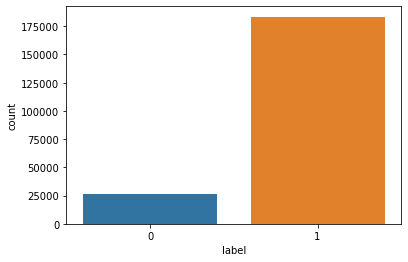

In [19]:
ab=sns.countplot(x='label', data=df)
print(df['label'].value_counts())

183431 customers paid back the credit amount(loan) within 5 days of issuing the loan i.e. they are non-defaulters and 26162 customers did not pay back the loan within 5 days of issuing the loan which means they are defaulters. Approximately 87.5% customers are non defaulters and only 12.5% customers are defaulters from the above graph.

0    209593
Name: pcircle, dtype: int64


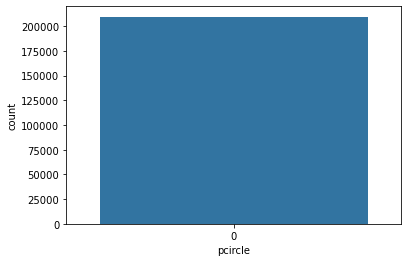

In [20]:
ab=sns.countplot(x='pcircle', data=df)
print(df['pcircle'].value_counts())

The telecom circle of all the customers is UPW i.e. single value for all the records which makes no difference in the analysis of data. Hence, we drop the column.

2016    209593
Name: pyear, dtype: int64


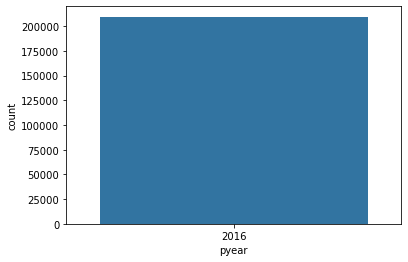

In [21]:
ab=sns.countplot(x='pyear', data=df)
print(df['pyear'].value_counts())

The whole record consists of the year 2016 which does not serve as an important information for analyzing data. Hence, we drop the variable.

0.0    197424
1.0      6172
0.5      5668
2.0       307
1.5        19
3.0         3
Name: medianamnt_loans90, dtype: int64


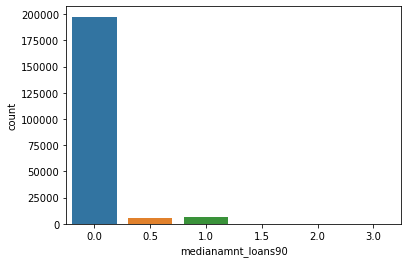

In [22]:
ab=sns.countplot(x='medianamnt_loans90', data=df)
print(df['medianamnt_loans90'].value_counts())

Median of amounts of loan taken by the user in last 90 days is 0.0 for 197424 customers which is for the maximum records and 3.0 for 3 customers which is the minimum records.

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64


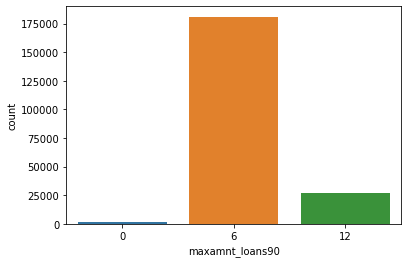

In [23]:
ab=sns.countplot(x='maxamnt_loans90', data=df)
print(df['maxamnt_loans90'].value_counts())

Maximum amount of loan taken by the user in last 90 days is 6 for 180945 customers (maximum records), 12 for 26605 customers and 0 for 2043 customers (minimum records).

0.0    195445
1.0      7149
0.5      6538
2.0       420
1.5        38
3.0         3
Name: medianamnt_loans30, dtype: int64


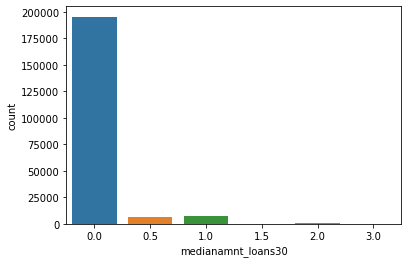

In [24]:
ab=sns.countplot(x='medianamnt_loans30', data=df)
print(df['medianamnt_loans30'].value_counts())

Median of amounts of loan taken by the user in last 30 days is 0.0 for 195445 customers which is for the maximum records and 3.0 for 3 customers which is the minimum records.

7    85765
6    83154
8    40674
Name: pmonth, dtype: int64


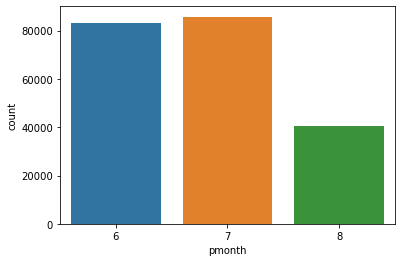

In [25]:
ab=sns.countplot(x='pmonth', data=df)
print(df['pmonth'].value_counts())

Maximum records are from the month of July(7) i.e. 85765 records, 83154 records from the month of June and 40674 records from the month of August which is the least.

In [26]:
#Dropping the columns which are not important
df.drop(['pyear','pcircle'],axis=1,inplace=True)

In [27]:
#Verifying dropped columns
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
msisdn                                                                      
21408I70789      0  272.0   3055.050000   3065.150000    220.13    260.13   
76462I70374      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
17943I70372      1  535.0   1398.000000   1398.000000    900.13    900.13   
55773I70781      1  241.0     21.228000     21.228000    159.42    159.42   
03813I82730      1  947.0    150.619333    150.619333   1098.90   1098.90   

             last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
msisdn                                                                
21408I70789                2.0                0.0              1539   
76462I70374               20.0                0.0              5787   
17943I70372                3.0                0.0              1539   
55773I70781               41.0                0.0               947   
03813I82730                4.0                0.0              2309   

             cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  \
msisdn                                                        
21408I70789              2          21.0             3078.0   
76462I70374              1           0.0             5787.0   
17943I70372              1           0.0             1539.0   
55773I70781              0           0.0                0.0   
03813I82730              7           2.0            20029.0   

             medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
msisdn                                                                   
21408I70789                1539.0                  7.50              2   
76462I70374                5787.0                 61.04              1   
17943I70372                1539.0                 66.32              1   
55773I70781                   0.0                  0.00              1   
03813I82730                2309.0                 29.00              8   

             fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
msisdn                                                               
21408I70789            21               3078                1539.0   
76462I70374             0               5787                5787.0   
17943I70372             0               1539                1539.0   
55773I70781             0                947                 947.0   
03813I82730             2              23496                2888.0   

             medianmarechprebal90  cnt_da_rech30  fr_da_rech30  cnt_da_rech90  \
msisdn                                                                          
21408I70789                  7.50            0.0           0.0              0   
76462I70374                 61.04            0.0           0.0              0   
17943I70372                 66.32            0.0           0.0              0   
55773I70781                  2.50            0.0           0.0              0   
03813I82730                 35.00            0.0           0.0              0   

             fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
msisdn                                                                  
21408I70789             0            2            12              6.0   
76462I70374             0            1            12             12.0   
17943I70372             0            1             6              6.0   
55773I70781             0            2            12              6.0   
03813I82730             0            7            42              6.0   

             medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
msisdn                                                                        
21408I70789                 0.0          2.0            12                6   
76462I70374                 0.0          1.0            12               12   
17943I70372                 0.0          1.0             6                6   
55773I70781                 0.0          2.0    

Variables "pcircle" and "pyear" cannot be seen in the above dataset.

# Making DataFrame of the Continuous type of Values

In [28]:
#Creatig a new dataframe
df1=df[['aon','daily_decr30', 'daily_decr90', 'rental30', 'rental90','last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma','cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30','medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90','fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90','medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30','cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30','maxamnt_loans30', 'cnt_loans90', 'amnt_loans90','payback30','payback90','pdate']].copy()

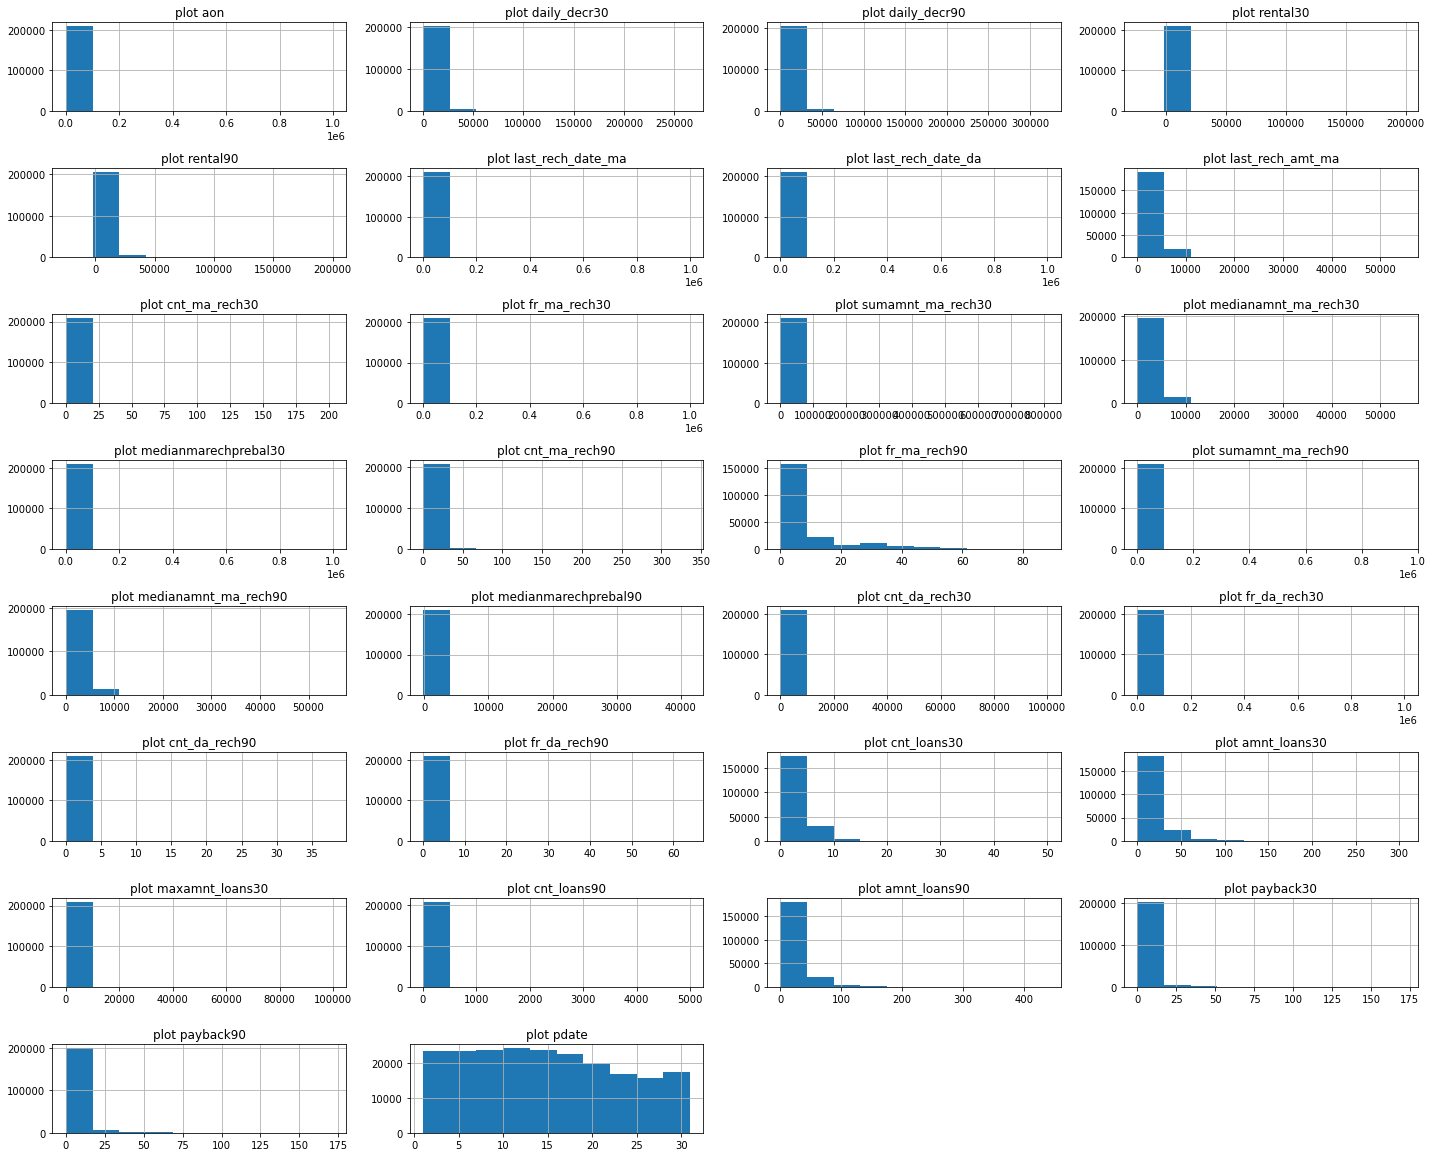

In [29]:
#Visualizing different columns using distplot
ncol,nrow=10,4
ab=df1.columns.values
plt.figure(figsize=(20,20))
for index,i in enumerate(ab):
    ab=plt.subplot(ncol,nrow,index+1)
    df[i].hist(grid=True)
    plt.title(f"plot {i}")
    plt.tight_layout()
plt.show()

Observations:
    
There are more than 2000 records for the dates 1 to 18 of the month but the records for the dates 18 to 31 are less than 2000.

Most of the values are observed to be 0 values in almost all the variables which indicates that there is no record history for most of the features.

Frequency of main account recharged in last 90 days (fr_ma_rech90) lies between values 0 to 60.

Number of loans taken by user in last 30 days (cnt_loans30) lies between values 0 to 30 but maximum records lie between 0 & 10.

Total amount of loans taken by user in last 30 days (amnt_loans30) is between values 0 & 150 but maximum records lie between values 0 & 60.

As there are too many variables present, hence it's difficult to analyze each attribute separately, hence we'll try to understand data using different visualization techniques.


# Describe Data

In [30]:
#Describing columns present in dataset
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pdate', 'pmonth'],
      dtype='object')

In [31]:
#Defining Shape
df.shape

(209593, 35)

We have 209593 rows and 35 columns in the dataset.

In [32]:
#Getting data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209593 entries, 21408I70789 to 65061I85339
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int

We have no Null Values and all values in the dataset are in int/float values. Now, we can proceed forward with describing and understanding data.

In [33]:
#Describing mean, median, min, max values of data
df.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.847800        3712.202921   
std      4308.586781    5770.461279       53905.892230       53374.833430   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  sumamnt_ma_rech30  \
count     209593.000000  209593.000000  209593.000000      209593.000000   
mean        2064.452797       3.978057    3737.355121        7704.501157   
std         2370.786034       4.256090   53643.625172       10139.621714   
min            0.000000       0.000000       0.000000           0.000000   
25%          770.000000       1.000000       0.000000        1540.000000   
50%         1539.000000       3.000000       2.000000        4628.000000   
75%         2309.000000       5.000000       6.000000       10010.000000   
max        55000.000000     203.000000  999606.368132      810096.000000   

       medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
count         209593.000000         209593.000000   209593.00000   
mean            1812.817952           3851.927942        6.31543   
std             2070.864620          54006.374433        7.19347   
min                0.000000           -200.000000        0.00000   
25%              770.000000             11.000000        2.00000   
50%             1539.000000             33.900000        4.00000   
75%             1924.000000             83.000000        8.00000   
max            55000.000000         999479.419319      336.00000   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count  209593.000000      209593.000000         209593.000000   
mean        7.716780       12396.218352           1864.595821   
std        12.590251       16857.793882           2081.680664   
min         0.000000           0.000000              0.000000   
25%         0.000000        2317.000000            773.000000   
50%         2.000000        7226.000000           1539.000000   
75%         8.000000       16000.000000           1924.000000   
max        88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         209593.000000  209593.000000  209593.000000  209593.000000   
mean              92.025541     262.578110    3749.494447       0.041495   
std              369.215658    4183.897978   53885.414979       0.397556   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       0.000000   
50%               36.000000       0.000000       0.000000       0.000000   
75%               79.310000       0.000000       0.000000       0.000000   
max            41456.500000   99914.441420  999809.240107      38.000000   

        fr_da_rech90    cnt_loans30   amnt_loans30  maxamnt_loans30  \
count  209593.000000  209593.000000  209593.000000    20959

<AxesSubplot:>

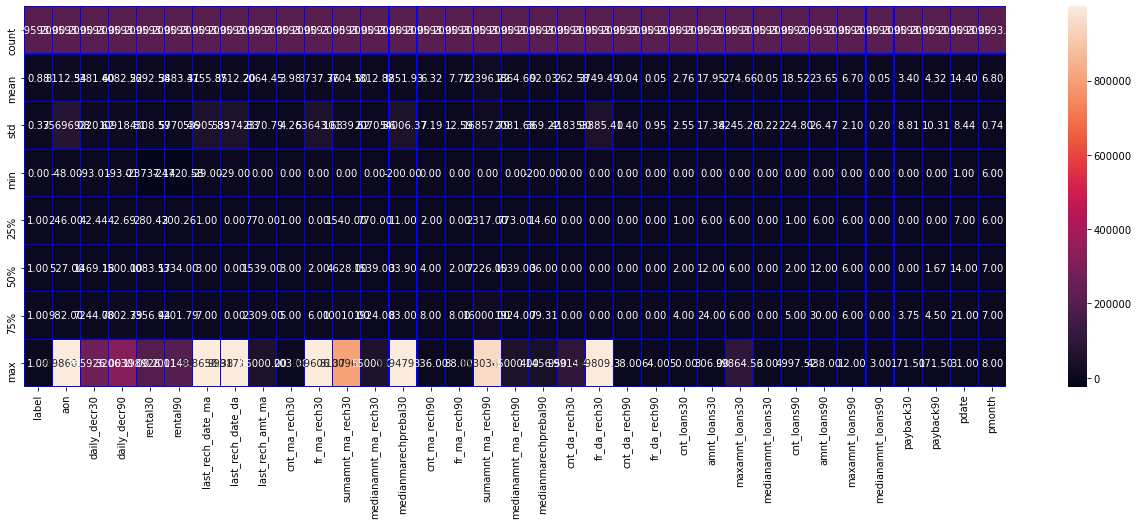

In [34]:
#Visualizing data description
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='blue',fmt='0.2f')

Observation:
    
The standard deviation of the columns in our dataset is very huge which means that the values in these columns are largely scattered and are not near to the mean values. They are very far away from their mean values.

The values in some attributes like 'aon','daily_decr30','daily_decr90','rental30','rental90','last_rech_date_ma','last_rech_date_da','medianmarechprebal30'and  'medianmarechprebal90' ranges from negative values to high positive values. The value range inside each attribute is very high within the dataset.

The min & max values in every column has huge range difference which indicates a possibility of having outliers and skewness in data.

Variables 'aon','last_rech_date_ma','last_rech_date_da','fr_ma_rech30','medianmarechprebal30','sumamnt_ma_rech90' and 'fr_da_rech30' have got the highest range of values reaching 1000000.



# Correlation of Columns with the Target Variable

In [35]:
#Checking correlation between variables
df.corr()

label       aon  daily_decr30  daily_decr90  \
label                 1.000000 -0.003785      0.168298      0.166150   
aon                  -0.003785  1.000000      0.001104      0.000374   
daily_decr30          0.168298  0.001104      1.000000      0.977704   
daily_decr90          0.166150  0.000374      0.977704      1.000000   
rental30              0.058085 -0.000960      0.442066      0.434685   
rental90              0.075521 -0.000790      0.458977      0.471730   
last_rech_date_ma     0.003728  0.001692      0.000487      0.000908   
last_rech_date_da     0.001711 -0.001693     -0.001636     -0.001886   
last_rech_amt_ma      0.131804  0.004256      0.275837      0.264131   
cnt_ma_rech30         0.237331 -0.003148      0.451385      0.426707   
fr_ma_rech30          0.001330 -0.001163     -0.000577     -0.000343   
sumamnt_ma_rech30     0.202828  0.000707      0.636536      0.603886   
medianamnt_ma_rech30  0.141490  0.004306      0.295356      0.282960   
medianmarechprebal30 -0.004829  0.003930     -0.001153     -0.000746   
cnt_ma_rech90         0.236392 -0.002725      0.587338      0.593069   
fr_ma_rech90          0.084385  0.004401     -0.078299     -0.079530   
sumamnt_ma_rech90     0.205793  0.001011      0.762981      0.768817   
medianamnt_ma_rech90  0.120855  0.004909      0.257847      0.250518   
medianmarechprebal90  0.039300 -0.000859      0.037495      0.036382   
cnt_da_rech30         0.003827  0.001564      0.000700      0.000661   
fr_da_rech30         -0.000027  0.000892     -0.001499     -0.001570   
cnt_da_rech90         0.002999  0.001121      0.038814      0.031155   
fr_da_rech90         -0.005418  0.005395      0.020673      0.016437   
cnt_loans30           0.196283 -0.001826      0.366116      0.340387   
amnt_loans30          0.197272 -0.001726      0.471492      0.447869   
maxamnt_loans30       0.000248 -0.002764     -0.000028      0.000025   
medianamnt_loans30    0.044589  0.004664     -0.011610     -0.005591   
cnt_loans90           0.004733 -0.000611      0.008962      0.009446   
amnt_loans90          0.199788 -0.002319      0.563496      0.567204   
maxamnt_loans90       0.084144 -0.001191      0.400199      0.397251   
medianamnt_loans90    0.035747  0.002771     -0.037305     -0.034686   
payback30             0.048336  0.001940      0.026915      0.019400   
payback90             0.049183  0.002203      0.047175      0.040800   
pdate                 0.006825  0.000662      0.006477     -0.021508   
pmonth                0.154949 -0.001863      0.518664      0.539410   

                      rental30  rental90  last_rech_date_ma  \
label                 0.058085  0.075521           0.003728   
aon                  -0.000960 -0.000790           0.001692   
daily_decr30          0.442066  0.458977           0.000487   
daily_decr90          0.434685  0.471730           0.000908   
rental30              1.000000  0.955237          -0.001095   
rental90              0.955237  1.000000          -0.001688   
last_rech_date_ma    -0.001095 -0.001688           1.000000   
last_rech_date_da     0.003261  0.002794           0.001790   
last_rech_amt_ma      0.127271  0.121416          -0.000147   
cnt_ma_rech30         0.233343  0.230260           0.004311   
fr_ma_rech30         -0.001219 -0.000503          -0.001629   
sumamnt_ma_rech30     0.272649  0.259709           0.002105   
medianamnt_ma_rech30  0.129853  0.120242          -0.001358   
medianmarechprebal30 -0.001415 -0.001237           0.004071   
cnt_ma_rech90         0.312118  0.345293           0.004263   
fr_ma_rech90         -0.033530 -0.036524           0.001414   
sumamnt_ma_rech90     0.342306  0.360601           0.002243   
medianamnt_ma_rech90  0.110356  0.103151          -0.000726   
medianmarechprebal90  0.027170  0.029547          -0.001086   
cnt_da_rech30        -0.001105 -0.000548          -0.003467   
fr_da_rech30         -0.002558 -0.002345          -0.003626   
cnt_da_rech90         0.072255  0.056282      

We can notice both positive and negative correlations between variables within the dataset. Let's try understanding data better using visualization.

<AxesSubplot:>

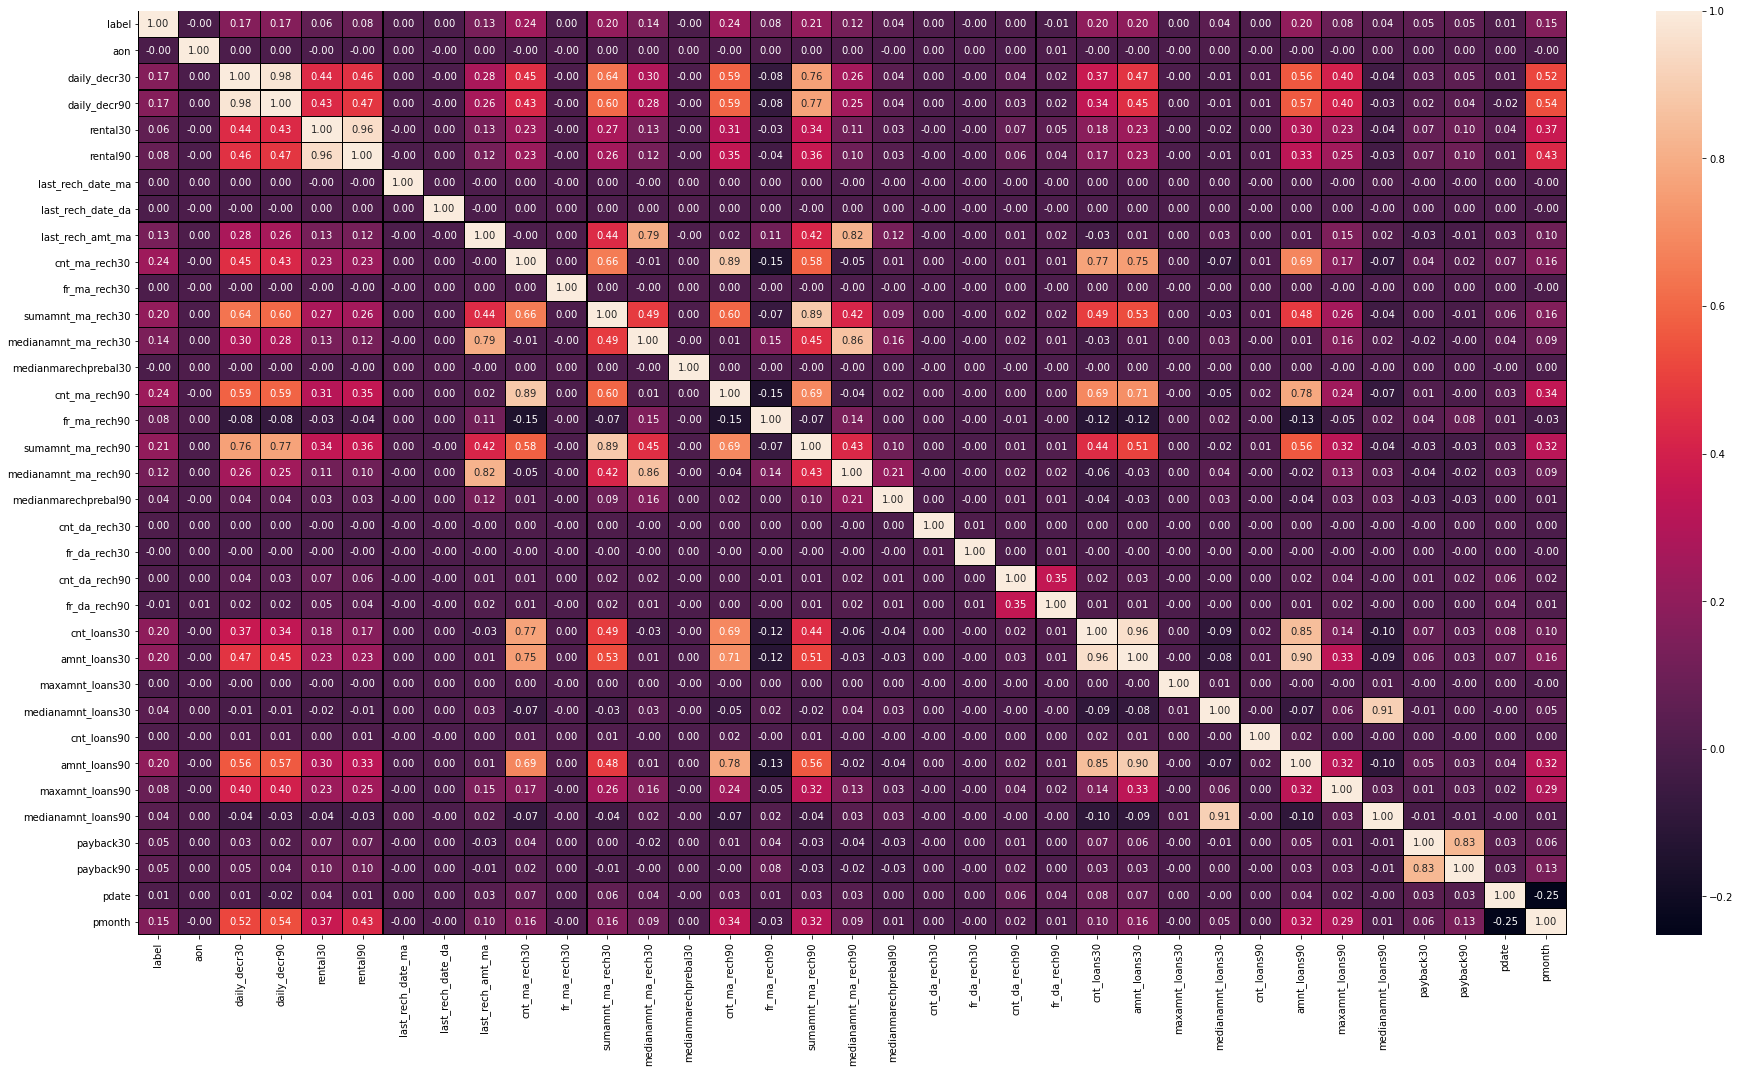

In [36]:
#Plotting correlation of input features with the target Variable
plt.figure(figsize=(32,17))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

Observations:
    
Most features are positively correlated to the Target Variable "label" and hardly few attributes are negatively correlated.

The most positively correlated variable to the target variable is 'cnt_ma_rech30' and 'cnt_ma_rech90'.

The most negatively correlated variable to the target variable is 'fr_da_rech90'.

Let's see correlations of input variables with the target variable in a sorted order.


In [37]:
#Sorting correlation in order with the Target Variable
corr_matrix=df.corr()
corr_matrix['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
pmonth                  0.154949
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
pdate                   0.006825
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
maxamnt_lo

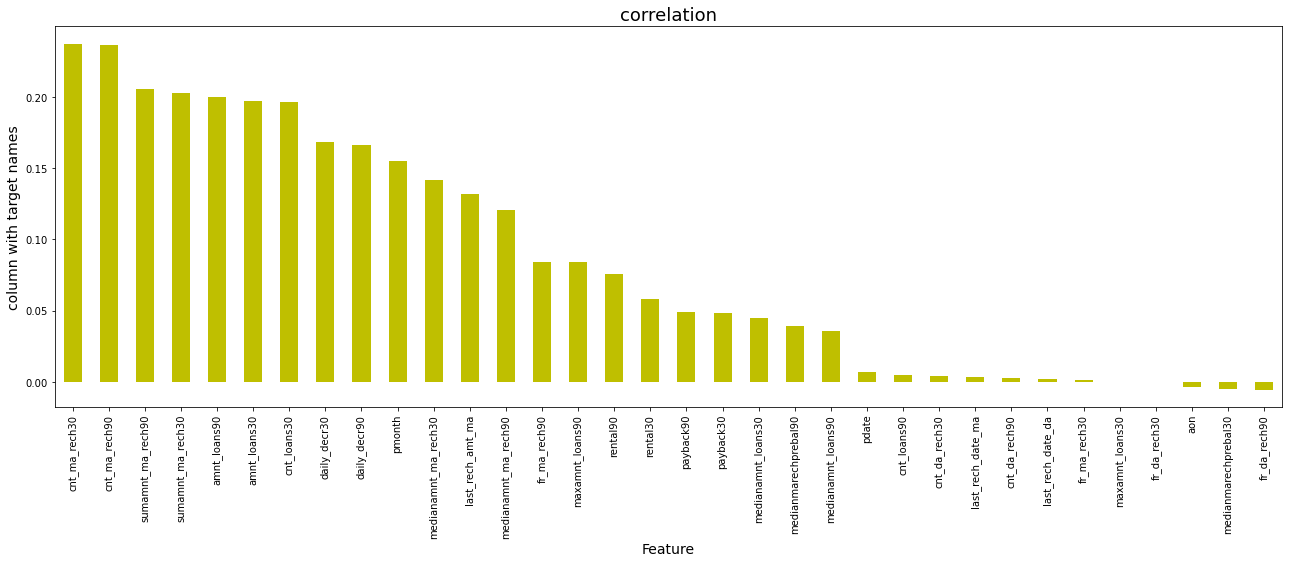

In [38]:
#Plotting Correlation in order with the target variable
plt.figure(figsize=(22,7))
df.corr()['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

From the above graph we cannot see any correlation of 'fr_da_rech30' and 'maxamnt_loans30' with the Target Variable 'label' and does not serve as much of importance to the data required for analysing it. Hence, we can drop the feature.

Features 'aon','medianmarechprebal30' and 'fr_da_rech90' are negatively correlated to the target variable.

All the other features are postively correlated to the target variable.

In [39]:
#Dropping the column 'fr_da_rech30' which does not serve as much importance
df.drop(['fr_da_rech30','maxamnt_loans30'],axis=1,inplace=True)

In [40]:
#Checking shape of dataframe
df.shape

(209593, 33)

# Checking skewness

In [41]:
#checking skewness
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loans90       4.895720
payback30     

Keeping threshold +/-0.5 as the range for skewness, we can see high skewness in almost every column of the dataset except the 'pdate' and 'pmonth' feature which explains the possibility of having huge outliers. Hence, we will treat the skewness present

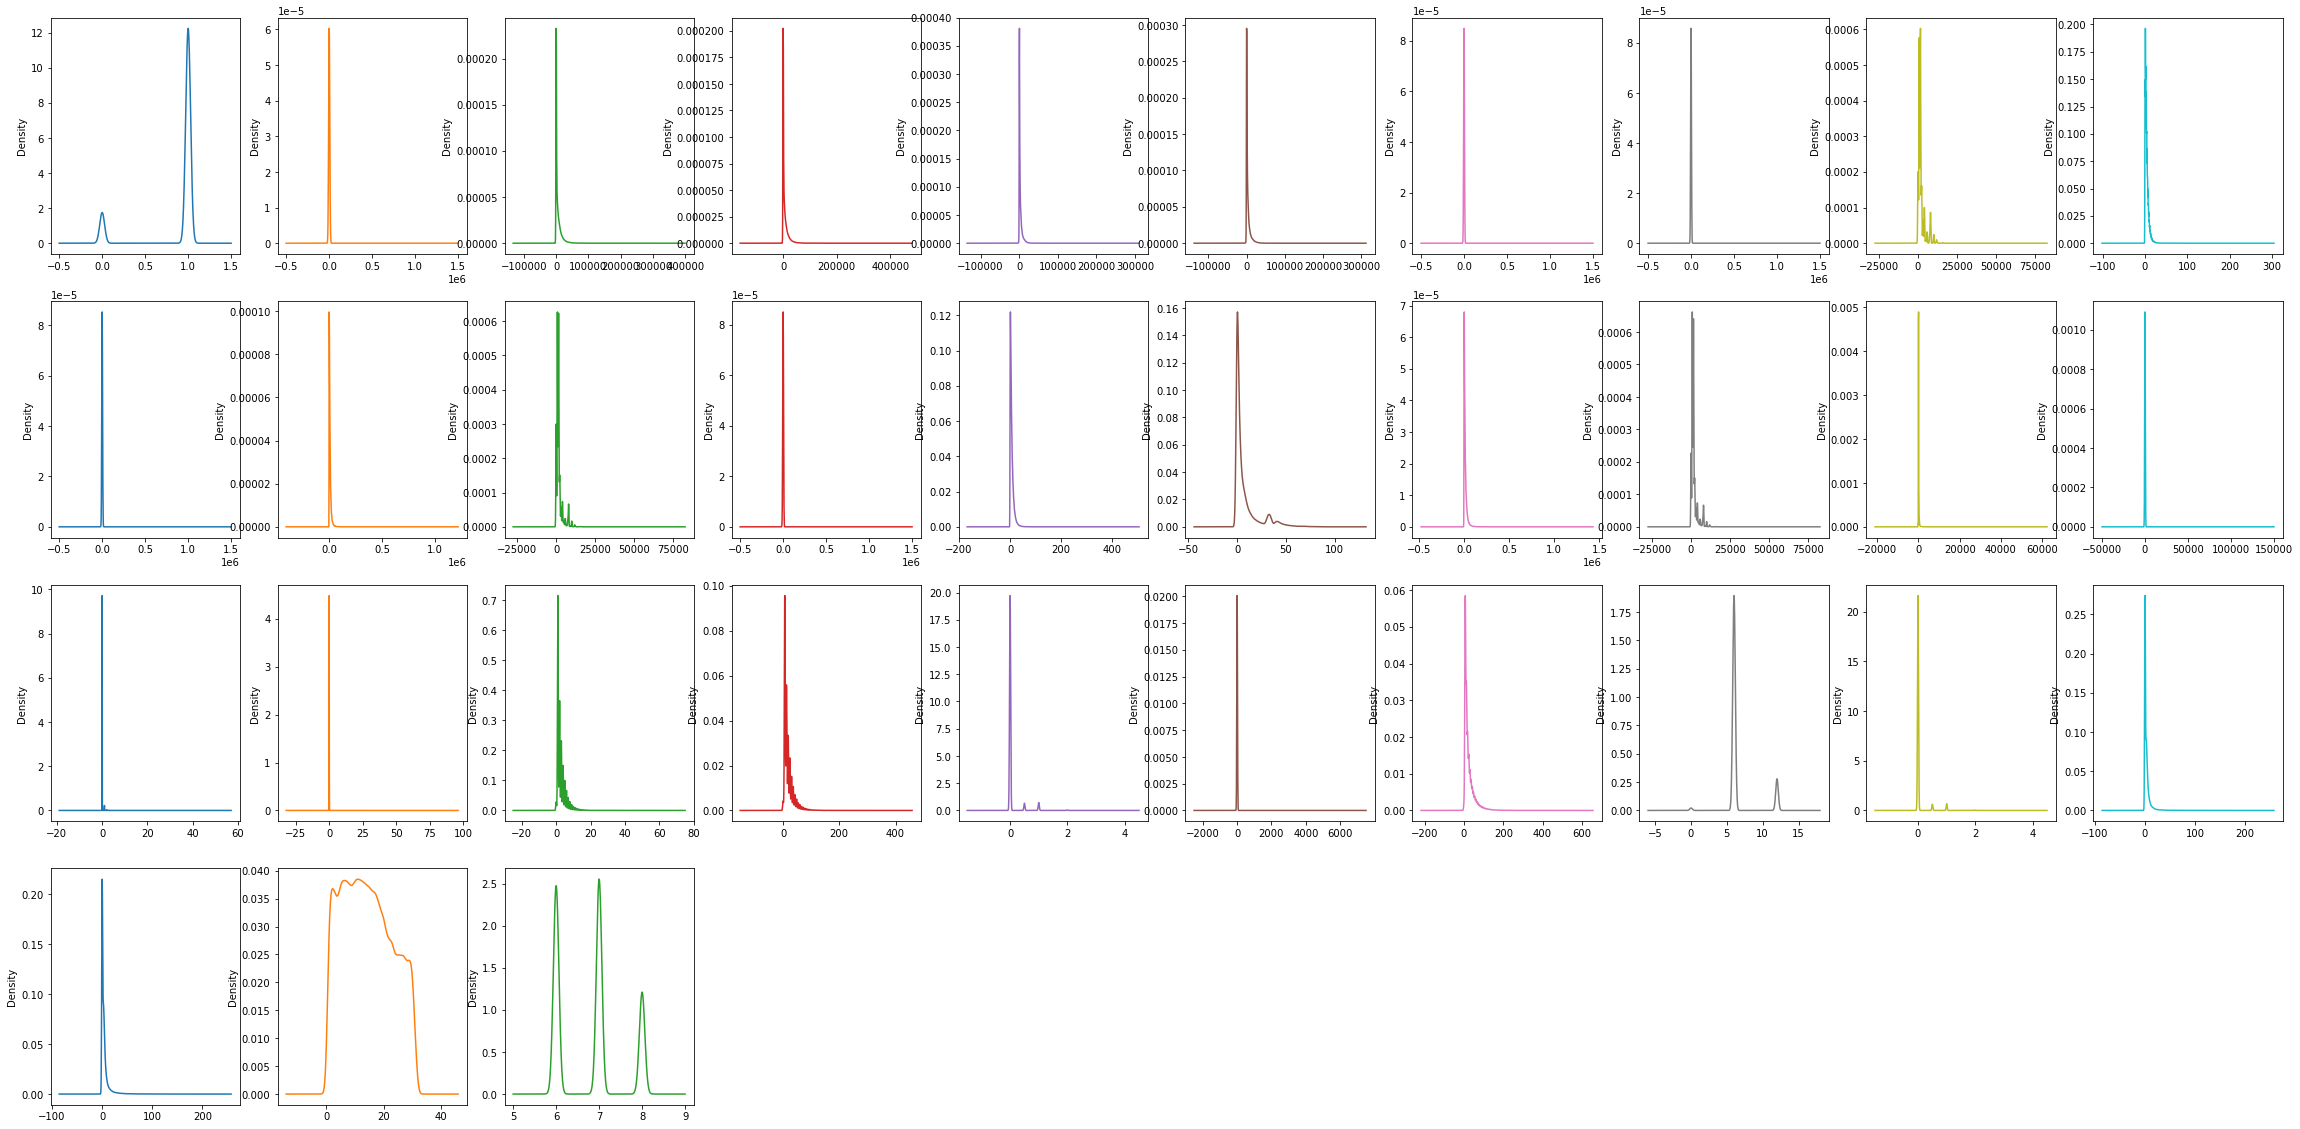

In [42]:
#Visualizing skewness on density graph
#Example of multi variate analysis
df.plot(kind='density',subplots=True,layout=(4,10),legend=False,sharex=False,figsize=(40,20))
plt.show()

The values are observed to be 0 values mostly in almost all columns.

The data is observed to have right skewness in almost all columns.

The data does not have a normal distribution hence we will try to resolve skewness in data.

# Checking Outliers

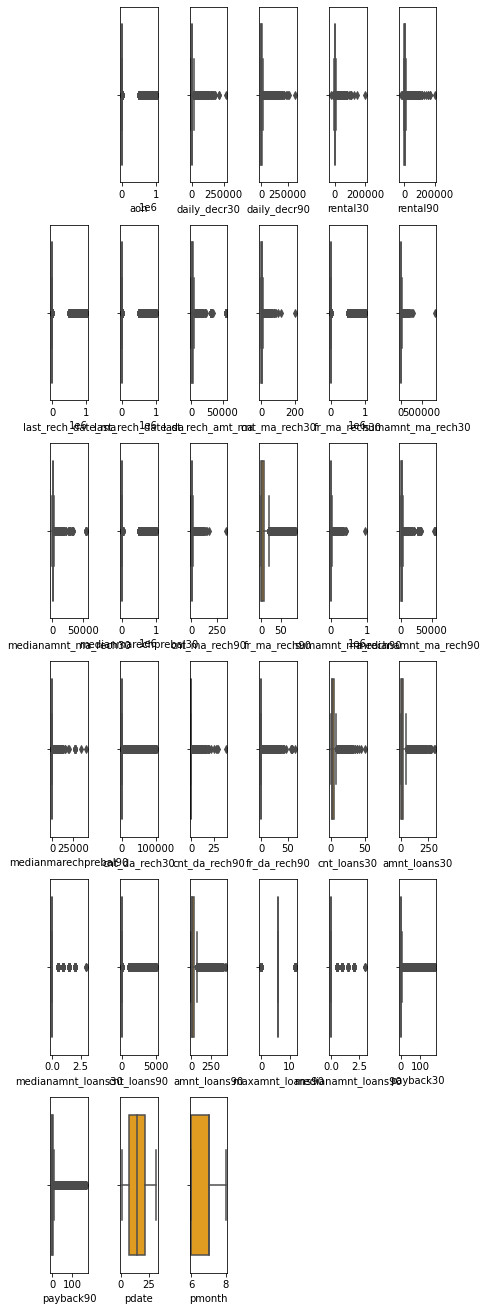

In [42]:
#Visualizing outliers of different variables
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#Visualizing outliers of different variables
collist=df.columns.values
ncol=6
nrows=10
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='orange',orient='v')
    plt.tight_layout()

We can see too many outliers present in the dataset. Tried removing outliers but it is giving an information loss of 22.5% which is huge data, hence data removal is not preffered. So instead of removing outliers, data transformation is applied to normalize data.

# Separating the Column into x & y

In [43]:
#Creating x & y columns 
x=df.drop('label',axis=1)
y=df['label']

Separating the columns into x & y as input featues and target variable respectively.

# Resolving Skewness using Power Transform

In [45]:
#Using power transform to remove skewness
from sklearn.preprocessing import power_transform
import warnings
warnings.filterwarnings('ignore')
hf=power_transform(x,method='yeo-johnson')

hf=pd.DataFrame(hf,columns=x.columns)

In [46]:
#Verifying skewness
hf.skew()

aon                       1.654517
daily_decr30             -6.582717
daily_decr90             -7.080193
rental30                 -1.022844
rental90                 -0.962717
last_rech_date_ma        -5.362529
last_rech_date_da      -106.606655
last_rech_amt_ma         -0.061262
cnt_ma_rech30            -0.000145
fr_ma_rech30              0.165015
sumamnt_ma_rech30        -0.291322
medianamnt_ma_rech30     -0.189628
medianmarechprebal30     -0.119058
cnt_ma_rech90            -0.002465
fr_ma_rech90              0.142952
sumamnt_ma_rech90        -0.192158
medianamnt_ma_rech90     -0.044604
medianmarechprebal90      7.506286
cnt_da_rech30             6.925820
cnt_da_rech90             6.006577
fr_da_rech90             15.469700
cnt_loans30               0.036243
amnt_loans30              0.001948
medianamnt_loans30        3.447735
cnt_loans90               0.105580
amnt_loans90             -0.008988
maxamnt_loans90           0.364282
medianamnt_loans90        3.779598
payback30           

Skewness in some features can be seen even after applying transformation methods. Hence, we will clean data getting into detail of each variable in which the skewness is observed.

# Normal Distribution Curve

<AxesSubplot:xlabel='last_rech_date_da', ylabel='Density'>

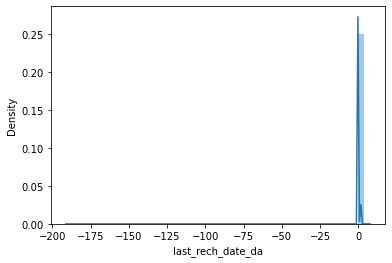

In [47]:
sns.distplot(hf['last_rech_date_da'],kde=True) 

<AxesSubplot:xlabel='fr_da_rech90', ylabel='Density'>

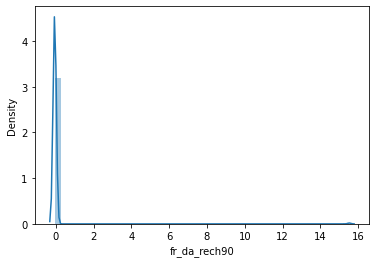

In [48]:
sns.distplot(hf['fr_da_rech90'],kde=True)

<AxesSubplot:xlabel='medianmarechprebal90', ylabel='Density'>

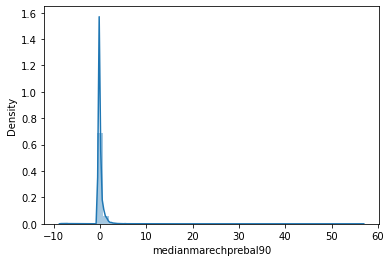

In [51]:
sns.distplot(hf['medianmarechprebal90'],kde=True) 

High Skewness is seen in features of all the above graphs so we will check it's correlation with target varaible, outliers present and skewness present in each column in order to clean data.

# Data Cleaning

In [54]:
#Making new dataframe
d=pd.DataFrame([["0.001711",'last_rech_date_da',"No","Alot"],["-0.005418",'fr_da_rech90',"No","Alot"],["0.039300",'medianmarechprebal90',"No","Alot"]],columns=["Correlation with Target","Column Name","Normalised","Outliers"])
d

Correlation with Target           Column Name Normalised Outliers
0                0.001711     last_rech_date_da         No     Alot
1               -0.005418          fr_da_rech90         No     Alot
2                0.039300  medianmarechprebal90         No     Alot

Here, we are setting threshold of correlation as +/-0.5. From the above dataframe we can observe that the features in it have no good correlation with our target variable, does not show a normal distribution of data and has got a lot of outliers in it, hence these features does not contain any useful information for data analysis so we decide to drop them.

In [55]:
#deleting columns "last_rech_date_da","fr_da_rech90","medianmarechprebal90" from dataset
hf.drop(["last_rech_date_da","fr_da_rech90","medianmarechprebal90"],axis=1,inplace=True)

In [56]:
#Shape of existing dataframe
hf.shape

(209593, 29)

We have 209593 rows and 29 columns existing in the dataset.

In [57]:
x=hf

# Scaling Data Using Standard Scaler

In [58]:
#importing library for scaling
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [59]:
#Scaling our data to improve model performance
sc=StandardScaler()
x=sc.fit_transform(hf)
x

array([[-0.17711186,  0.33215599,  0.29918139, ...,  1.78396389,
         0.71081705,  0.39752189],
       [ 0.03645291,  1.11602076,  1.04508395, ..., -1.01891695,
        -0.41015086,  1.48013263],
       [-0.03465905, -0.00750824, -0.02820272, ..., -1.01891695,
         0.60996673,  1.48013263],
       ...,
       [ 0.13457681,  1.10045476,  1.03342361, ...,  0.75293936,
         1.54675655,  0.39752189],
       [ 0.30910144,  1.13605674,  1.06838077, ...,  1.3378306 ,
         1.18938459,  0.39752189],
       [ 0.27706283,  0.52502127,  0.48715657, ..., -1.01891695,
        -0.81941171,  0.39752189]])

Hence, the data is Scaled.

In [60]:
y.value_counts()

1    183431
0     26162
Name: label, dtype: int64

y consists of 183431 records in 'label' "1" and 26162 records in 'label' "0". As we can see that the data is imbalanced in the target variable so Sampling techniques can be tried to handle the imbalance nature of target variablle.

# Model Building

In [73]:
#importing Libraries for buiding model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [63]:
#Code for finding best random state
dt=DecisionTreeClassifier()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print(f'At random state {i}, the training accuracy is: {accuracy_score(y_train,pred_train)}')
    print(f'At random state {i}, the testing accuracy is: {accuracy_score(y_test,pred_test)}')
    print("\n")

At random state 0, the training accuracy is: 0.9999642162768229
At random state 0, the testing accuracy is: 0.8855650182494812


At random state 1, the training accuracy is: 0.9999821081384115
At random state 1, the testing accuracy is: 0.8844199527660488


At random state 2, the training accuracy is: 0.9999761441845486
At random state 2, the testing accuracy is: 0.8830124764426632


At random state 3, the training accuracy is: 0.9999761441845486
At random state 3, the testing accuracy is: 0.883346453875331


At random state 4, the training accuracy is: 0.99995825232296
At random state 4, the testing accuracy is: 0.8857558624967199


At random state 5, the training accuracy is: 0.9999701802306857
At random state 5, the testing accuracy is: 0.8817242777738018


At random state 6, the training accuracy is: 0.99995825232296
At random state 6, the testing accuracy is: 0.8845153748896681


At random state 7, the training accuracy is: 0.9999642162768229
At random state 7, the testing accurac

At random state 63, the training accuracy is: 0.9999701802306857
At random state 63, the testing accuracy is: 0.8874257496600587


At random state 64, the training accuracy is: 0.9999761441845486
At random state 64, the testing accuracy is: 0.8821298217991841


At random state 65, the training accuracy is: 0.9999761441845486
At random state 65, the testing accuracy is: 0.8832510317517116


At random state 66, the training accuracy is: 0.9999880720922742
At random state 66, the testing accuracy is: 0.8864238173620554


At random state 67, the training accuracy is: 0.9999821081384115
At random state 67, the testing accuracy is: 0.8873541830673441


At random state 68, the training accuracy is: 0.9999701802306857
At random state 68, the testing accuracy is: 0.8864476728929602


At random state 69, the training accuracy is: 0.9999701802306857
At random state 69, the testing accuracy is: 0.8837997089625229


At random state 70, the training accuracy is: 0.9999761441845486
At random state 70

Best random state selected is 31.

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=31)

We split our data into Training and Testing giving 78% data for Training and 22% for Testing at random state 31. We will use different algorithms for comparing accuracies and attaining the best model. We will compare Logitic Regression, DecisionTreeClassifier, GaussianNB, KNeighborsClassifier and RandomForestClassifier in this case.



# Over Sampling

In [75]:
#!pip install imbalanced-learn

In [76]:
#Importing libraries
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
Counter(y_train)

Counter({0: 20513, 1: 142969})

In [77]:
#Creating object and fitting train samples using Oversampling
os=RandomOverSampler(0.8)
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({1: 142969, 0: 20513})
The number of classes after fit Counter({1: 142969, 0: 114375})


In [78]:
#Object creation for all classifiers 
lr=LogisticRegression()
gnb=GaussianNB()
dt=DecisionTreeClassifier()
kn=KNeighborsClassifier()
rf=RandomForestClassifier()

In [79]:
model=[LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),KNeighborsClassifier()]

In [68]:
for m in model:
    m.fit(x_train_ns,y_train_ns)
    m.score(x_train_ns,y_train_ns)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.7821994751794583
[[ 4168  1481]
 [ 8562 31900]]
              precision    recall  f1-score   support

           0       0.33      0.74      0.45      5649
           1       0.96      0.79      0.86     40462

    accuracy                           0.78     46111
   macro avg       0.64      0.76      0.66     46111
weighted avg       0.88      0.78      0.81     46111



Accuracy score of GaussianNB() is:
0.7227559584480926
[[ 4356  1293]
 [11491 28971]]
              precision    recall  f1-score   support

           0       0.27      0.77      0.41      5649
           1       0.96      0.72      0.82     40462

    accuracy                           0.72     46111
   macro avg       0.62      0.74      0.61     46111
weighted avg       0.87      0.72      0.77     46111



Accuracy score of DecisionTreeClassifier() is:
0.8897443126368979
[[ 3136  2513]
 [ 2571 37891]]
              precision    recall  f1-score   support

           0

We get an accuracy of 78.21% in Logistic Regression, 72.27% Gaussian NB, 88.97% Decision Tree and 82.88% KNeighbors Classifiers. But the accuracy isn't enough especially when the data is imbalanced so looking at other metrics such as precision, recall and f1 score, the model is not performing so well. Let's try ensemble techniques and hypertuning these models to attain better performance metrics. 

#### Ensemble Techniques

In [69]:
#Importing libraries and perform training
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train_ns,y_train_ns)

RandomForestClassifier()

In [70]:
#Performing predictions
y_pred=rf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 3360  2289]
 [ 1303 39159]]
0.9221010171108847
              precision    recall  f1-score   support

           0       0.72      0.59      0.65      5649
           1       0.94      0.97      0.96     40462

    accuracy                           0.92     46111
   macro avg       0.83      0.78      0.80     46111
weighted avg       0.92      0.92      0.92     46111



The performance of Random Forest can be seen to be better comparing other models. Let's use hypertuning on these algorithms.

# Hyper Parameter Tuning

In [80]:
#Importing Libarary for Hyper Parameter Tuning SearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

##### Logistic Regression

In [72]:
#Finding best parameters
parameters={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2'],'multi_class':['auto','ovr']}
cv=KFold(n_splits=9,random_state=None,shuffle=False)
clf=RandomizedSearchCV(lr,parameters,cv=cv,scoring='f1_macro')
clf.fit(x_train_ns,y_train_ns)

print(clf.best_params_)

{'penalty': 'l2', 'multi_class': 'ovr', 'C': 1.0}


In [73]:
#Predicting results
y_pred=clf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 4168  1481]
 [ 8562 31900]]
0.7821994751794583
              precision    recall  f1-score   support

           0       0.33      0.74      0.45      5649
           1       0.96      0.79      0.86     40462

    accuracy                           0.78     46111
   macro avg       0.64      0.76      0.66     46111
weighted avg       0.88      0.78      0.81     46111



There is no improvement in the performance of Logistic Regression because the precision and f1 score is very low.

##### Gaussian NB

In [74]:
#Finding best parameters
parameters={'var_smoothing': np.logspace(0,-9, num=100)}
cv=KFold(n_splits=9,random_state=None,shuffle=False)
clf1=RandomizedSearchCV(gnb,parameters,cv=cv,scoring='accuracy')
clf1.fit(x_train_ns,y_train_ns)

print(clf1.best_params_)

{'var_smoothing': 8.111308307896872e-07}


In [77]:
#Predicting results
y_pred=clf1.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 4356  1293]
 [11491 28971]]
0.7227559584480926
              precision    recall  f1-score   support

           0       0.27      0.77      0.41      5649
           1       0.96      0.72      0.82     40462

    accuracy                           0.72     46111
   macro avg       0.62      0.74      0.61     46111
weighted avg       0.87      0.72      0.77     46111



The precision and f1 score of Gaussian Nb is also very low, hence no good performnce.

##### Decision Tree Classifier

In [76]:
#Finding best parameters
parameters={"criterion":["gini","entropy"],'max_depth':np.arange(2,15),"max_features":np.arange(1, 9),'min_samples_leaf':np.arange(3,9)}
cv=KFold(n_splits=9,random_state=None,shuffle=False)
clf2=RandomizedSearchCV(dt,parameters,cv=cv,scoring='accuracy')
clf2.fit(x_train_ns,y_train_ns)

print(clf2.best_params_)

{'min_samples_leaf': 5, 'max_features': 5, 'max_depth': 12, 'criterion': 'gini'}


In [78]:
#Predicting results
y_pred=clf2.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 4414  1235]
 [ 6110 34352]]
0.8407104595432761
              precision    recall  f1-score   support

           0       0.42      0.78      0.55      5649
           1       0.97      0.85      0.90     40462

    accuracy                           0.84     46111
   macro avg       0.69      0.82      0.72     46111
weighted avg       0.90      0.84      0.86     46111



Performance of decision tree is better than any other algorithm, but the precision and f1 score is still less.

##### Random Forest Classifier

In [81]:
#Finding best parameters
parameters={"criterion":["gini","entropy"],"max_features":["auto","sqrt"],"max_depth":np.arange(1, 28, 1)}
cv=KFold(n_splits=5,random_state=None,shuffle=False)
clf3=RandomizedSearchCV(rf,parameters,cv=cv,scoring='accuracy')
clf3.fit(x_train_ns,y_train_ns)

print(clf3.best_params_)

{'max_features': 'auto', 'max_depth': 24, 'criterion': 'gini'}


In [82]:
#Predicting results
y_pred=clf3.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 3647  2002]
 [ 1665 38797]]
0.9204745071674871
              precision    recall  f1-score   support

           0       0.69      0.65      0.67      5649
           1       0.95      0.96      0.95     40462

    accuracy                           0.92     46111
   macro avg       0.82      0.80      0.81     46111
weighted avg       0.92      0.92      0.92     46111



The accuracy obtained for Random Forest is 92% which is the best out of any other algorithms and also the performance of other metrics such as precision, recall and f1 score is better than any other algorithms used for model Training. We get the best results from Random Forest, hence we use Random Forest Classifier for this dataset.

# Plotting AUC ROC Curve

In [83]:
#Importing libraries to plot auc roc curve
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score


In [84]:
#Creating AUC ROC curve for Random Forest Classifier
clf3.fit(x,y)
y_pred_prob=clf3.predict_proba(x_test)[:,1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
roc_auc=auc(fpr,tpr)

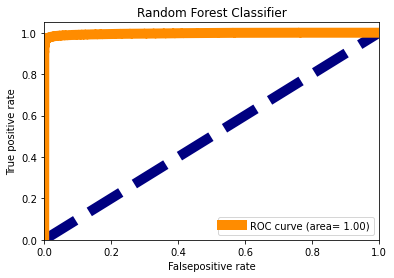

In [85]:
#Plotting Graph
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area= %0.2f)'%roc_auc)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Falsepositive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()

We get auc roc score as 100% which means our model is working rightly. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

# Saving the Best Model

In [86]:
#Saving the best model
import pickle
filename='credit.pkl'
pickle.dump(clf3,open(filename,'wb'))